### Data analsysis

Start by loading the data in the sql document


In [1]:
import numpy as np
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

path = ""
database = path + 'database.sqlite'
con = sqlite3.connect(database)

In [2]:
# import tables
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
match_table = pd.read_sql_query("SELECT * FROM Match", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
country_table = pd.read_sql_query("SELECT * FROM Country", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)


### Country table analysis

After analysing the table we can see that there is **no problem with the data**. There are no duplicates, null values or data that does not make sense. The table has **eleven countries** from europe. All rows are unique and every column can be a candidate key.

In [45]:
print("- Dimension of Country table: {}".format(country_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(country_table.info())
print(100*"-")
print("- Just to check duplicates: \n")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(country_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(country_table.isnull().sum(axis=0))
print(100*"-")
country_table.head()

- Dimension of Country table: (11, 2)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None
----------------------------------------------------------------------------------------------------
- Just to check duplicates: 

           name
count        11
unique       11
top     England
freq          1
----------------------------------------------------------------------------------------------------
- Table statistics: 

                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
-------------------

id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland

### League table analysis

After analysing the table we can see that there is **no problem with the data**. There are no duplicates, null values or data that does not make sense. There are **eleven different leagues one per country**. All rows are unique and every column can be a candidate key.

In [47]:
#analyse the league table
print("Dimension of League Table is: {}".format(league_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(league_table.info())
print(100*"-")
print("- Just to check duplicates: \n")
print(league_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(league_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(league_table.isnull().sum(axis=0))
league_table.head()


Dimension of League Table is: (11, 3)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None
----------------------------------------------------------------------------------------------------
- Just to check duplicates: 

                  name
count               11
unique              11
top     France Ligue 1
freq                 1
----------------------------------------------------------------------------------------------------
- Table statistics: 

                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std   

id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A

### Player table analysis

After analysing the table we can see that there is **no problem with the data**.
There are no duplicates, null values or data that does not make sense. There are both columns with high and low cardinality. some columns are more correlated with some than others.

In [64]:
#analyse player
print("Dimension of Player Table is: {}".format(player_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(player_table.info())
print(100*"-")
print("- Just to check duplicates: \n")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(player_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(player_table.isnull().sum(axis=0))
print(100*"-")
#player_table.head()
print("Duplicated columns: {}". format(player_table.duplicated().sum()))
player_table.head()

Dimension of Player Table is: (11060, 7)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None
----------------------------------------------------------------------------------------------------
- Just to check duplicates: 

       player_name             birthday
count        11060                11060
unique 

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

<br>
<br>
<span style="font-size:medium;line-height:1.5em;">Analysing the continuous variables <strong>weight</strong> and the <strong>height</strong> we conclude that even though they are continuous they have low cardinality with the database having 11060 valid rows. Besides that, both follow a normal distribution and a <strong>linear relationship</strong>, higher players seem to weight more. As expected the cardinality of the feature birthday is higher. As it was supposed to be both the features <strong>player_api_id and player_fifa_api_id are candidate keys.</strong></span>
<br>


Cardinality of Height: 0.1808 %
Cardinality of Weight: 0.4521 %
Cardinality of birthday: 52.0976 %
----------------------------------------------------------------------------------------------------
The feature player_api_id does not have duplicates? True
The feature player_fifa_api_id does not have duplicates? True


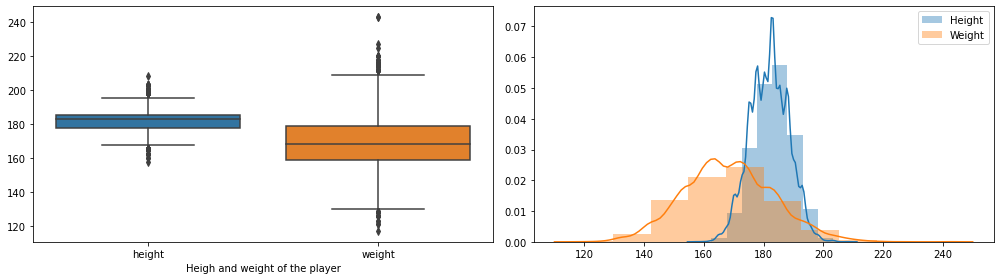

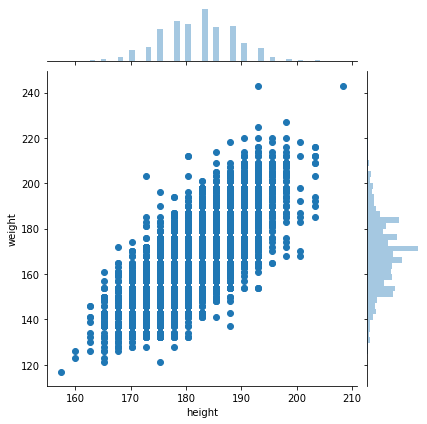

In [72]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player_table.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Heigh and weight of the player')
ax1[0].set_ylabel('')
sns.distplot(a = player_table.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Height')
sns.distplot(a = player_table.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Weight')
ax1[1].legend()
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')
fig1.tight_layout()
print("Cardinality of Height: {:0.4f} %".format( \
        100 * (len(np.unique(player_table.loc[:,'height'])) / len(player_table.loc[:,'height']))))
print("Cardinality of Weight: {:0.4f} %".format( \
        100 * (len(np.unique(player_table.loc[:,'weight'])) / len(player_table.loc[:,'weight']))))
print("Cardinality of birthday: {:0.4f} %".format( \
        100 * (len(np.unique(player_table.loc[:,'birthday'])) / len(player_table.loc[:,'birthday']))))
print(100*"-")
print("The feature player_api_id does not have duplicates? {}".format(player_table["player_api_id"].is_unique)) 
print("The feature player_fifa_api_id does not have duplicates? {}".format(player_table["player_fifa_api_id"].is_unique)) 

### Player attribute table

After analysing the table we can see that there is **there are a few problems**.
Even though there are no duplicated values, there are quite a good number of null values. By using the fifa values we are prone to errors since they follow some formulas that do not work for all players since are based in statistics that do not take into consideration everything. <p> Mueller-Moehring said that you can’t rely on these stats a 100 percent, because even if they’re comprehensive, they don’t always tell the whole story. “The stats are, in most cases, not taking into account very specific circumstances,” he said.</p> <p> "When you look at passing completion, if you play for Bayern Munich or if you play for Manchester City or if you play for Pep Guardiola, if your system is based on possession, you will have more successful passes than other players, but this doesn’t necessarily make you a better passer."<p/> <p> "There’s another, equally interesting bit of info to take into account: the league the player plays for determines the ceiling and floor of his abilities."</p>

<p> So it is easily understandable that this information could be more accuratable in certain situations</p>



In [90]:
#analyze player attribute table

print("Dimension of Player Attributes Table is: {}".format(player_att_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(player_att_table.info())
print(100*"-")
print("- Just to check duplicates: \n")
print(player_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(player_att_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(player_att_table.isnull().sum(axis=0))
print("-Number of nulls :{}".format(player_att_table.isna().sum().sum()))
print("Duplicated columns: {}". format(player_att_table.duplicated().sum()))


Dimension of Player Attributes Table is: (183978, 42)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float6

Duplicated columns: 0


In [76]:
# just to see some player features... there are a lot
player_att_table.select_dtypes(include =['float64','int64']).head().\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].head()

overall_rating  potential  crossing  finishing  heading_accuracy  \
0            67.0       71.0      49.0       44.0              71.0   
1            67.0       71.0      49.0       44.0              71.0   
2            62.0       66.0      49.0       44.0              71.0   
3            61.0       65.0      48.0       43.0              70.0   
4            61.0       65.0      48.0       43.0              70.0   

   short_passing  volleys  dribbling  curve  free_kick_accuracy  long_passing  \
0           61.0     44.0       51.0   45.0                39.0          64.0   
1           61.0     44.0       51.0   45.0                39.0          64.0   
2           61.0     44.0       51.0   45.0                39.0          64.0   
3           60.0     43.0       50.0   44.0                38.0          63.0   
4           60.0     43.0       50.0   44.0                38.0          63.0   

   ball_control  acceleration  sprint_speed  agility  reactions  balance  \
0          49.0          60.0          64.0     59.0       47.0     65.0   
1          49.0          60.0          64.0     59.0       47.0     65.0   
2          49.0          60.0          64.0     59.0       47.0     65.0   
3          48.0          60.0          64.0     59.0       46.0     65.0   
4          48.0          60.0          64.0     59.0       46.0     65.0   

   shot_power  jumping  stamina  strength  long_shots  aggression  \
0        55.0     58.0     54.0      76.0        35.0        71.0   
1        55.0     58.0     54.0      76.0        35.0        71.0   
2        55.0     58.0     54.0      76.0        35.0        63.0   
3        54.0     58.0     54.0      76.0        34.0        62.0   
4        54.0     58.0     54.0      76.0        34.0        62.0   

   interceptions  positioning  vision  penalties  marking  standing_tackle  \
0           70.0         45.0    54.0       48.0     65.0             69.0   
1           70.0         45.0    54.0       48.0     65.0             69.0   
2           41.0         45.0    54.0       48.0     65.0             66.0   
3           40.0         44.0    53.0       47.0     62.0             63.0   
4           40.0         44.0    53.0       47.0     62.0             63.0   

   sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0            69.0        6.0         11.0        10.0             8.0   
1            69.0        6.0         11.0        10.0             8.0   
2            69.0        6.0         11.0        10.0             8.0   
3            66.0        5.0         10.0         9.0             7.0   
4            66.0        5.0         10.0         9.0             7.0   

   gk_reflexes  
0          8.0  
1          8.0  
2          8.0  
3          7.0  
4          7.0

<h3>Cleaning the null values</h3>
<p>Since we have a lot of rows, we could have opted to drop the rows with null values.</p>
<p>However we decided to use the mean, since we do not want to discard all the other non null values of a row</p>
<p>We could have explored the ffill method or bfill, but we considered the mean the one that made more sense.</p>

In [90]:
# player_att_table = player_att_table.dropna(how='any')
for column in player_att_table:
    if player_att_table[column].isnull().values.any():
        player_att_table.fillna(player_att_table[column].mean(), inplace=True)

print("Number of nulls :{}".format(player_att_table.isna().sum().sum()))
print("Duplicated columns: {}". format(player_att_table.duplicated().sum()))


Number of nulls :0
Duplicated columns: 0


<p> - Checking the correlation amongst attributes, we can conclude that the attributes related to one's position: goalkeeper, defender, mid-fielder and forward show a higher coorelation</p>
<p> - We can also see that the biggest negative correlations are between the goalkeeper abilities and the other positions</p>
<p> - It is a bit surprising seeing that the biggest correlation for the potencial is the feature reaction. Moreover we can see that the potencial and overall ratting are pretty correlated.</p>
<p> - These values also raise some questions, such as "What is the meaning of someone's potencial?" since it appears as if goalkeepers' abilities are not related to such notion, so is it not possible for one to have potencial? The defenders are not so far away from the same situation</p>
<p> - Not so surprisingly there are a few pairs of features that are not much related such as dribbling and long shots or curve and long shots or even standing tackle and long shots</p>

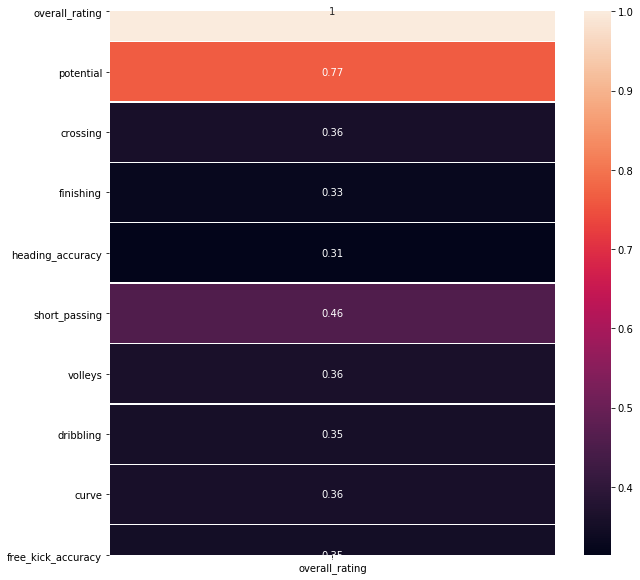

In [20]:
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()[['overall_rating']].head(10)
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=10,h=10)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

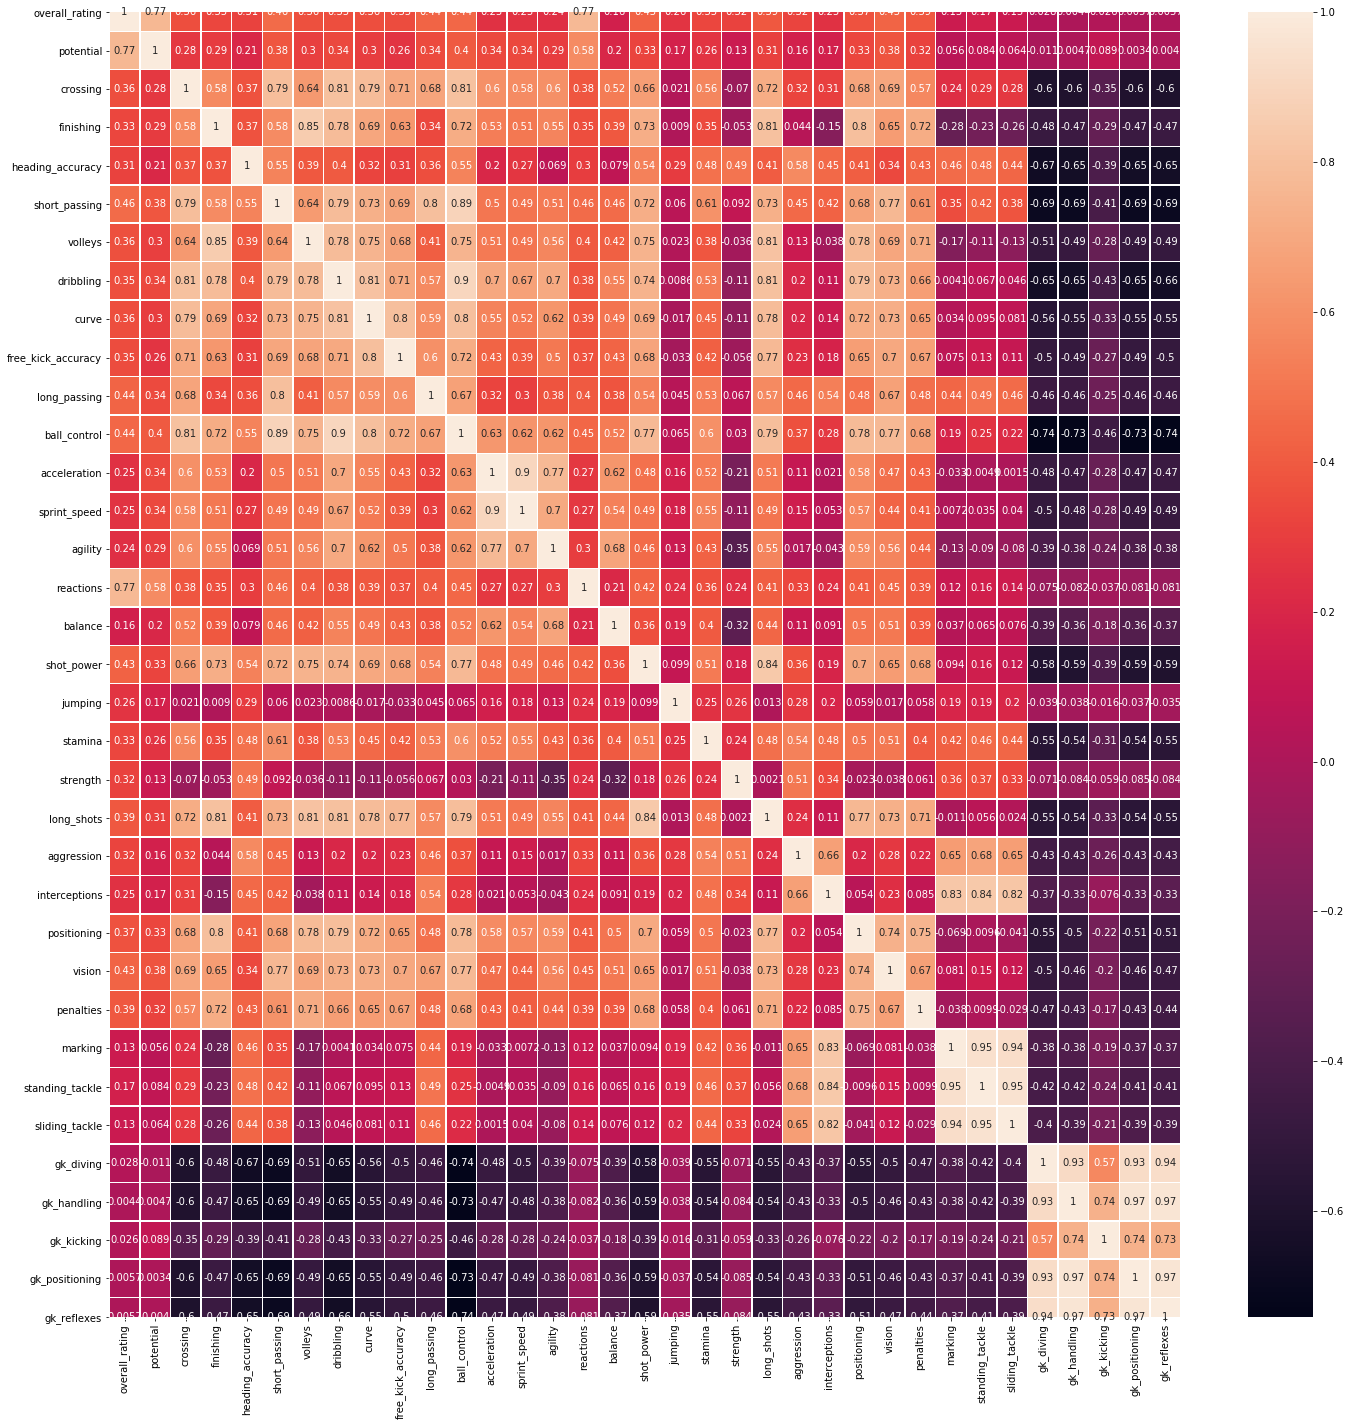

In [21]:
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

<p>We want to check the influence of the foot in the attacking working rate and defensive working rate</p>
<p> In the first place, we have to clean the data since it has values that do not make sense</p>
<p> After that, we can see that the majority always belongs to the label medium. We can also check that there are more players that prefer their right foot instead of its left.</p>

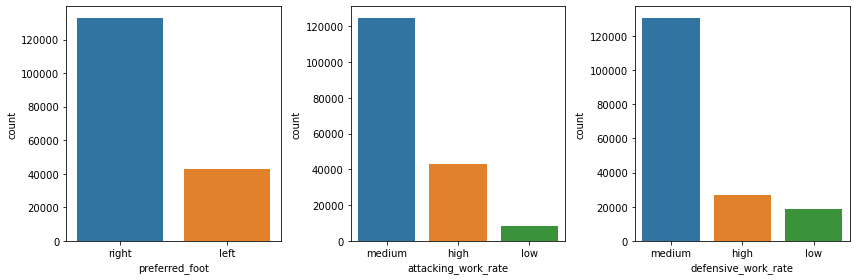

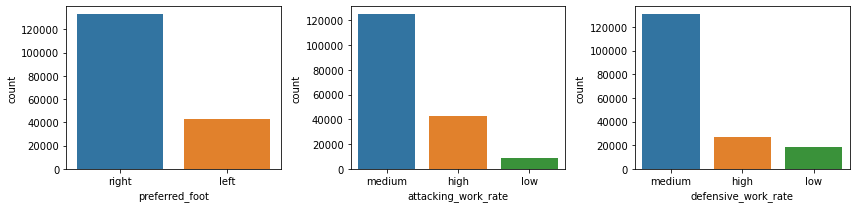

In [94]:

fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)
fig3.set_size_inches(12,4)
sns.countplot(x = player_att_table['preferred_foot'],ax = ax3[0])
sns.countplot(x = player_att_table['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = player_att_table['defensive_work_rate'],ax = ax3[2])
fig3.tight_layout()

player_att_table_updated1 = player_att_table.loc[(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:]
#after tables
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.countplot(x = player_att_table_updated1['preferred_foot'],ax = ax4[0])
sns.countplot(x = player_att_table_updated1['attacking_work_rate'],ax = ax4[1])
sns.countplot(x = player_att_table_updated1['defensive_work_rate'],ax = ax4[2])
fig4.tight_layout()
player_att_table = player_att_table_updated1

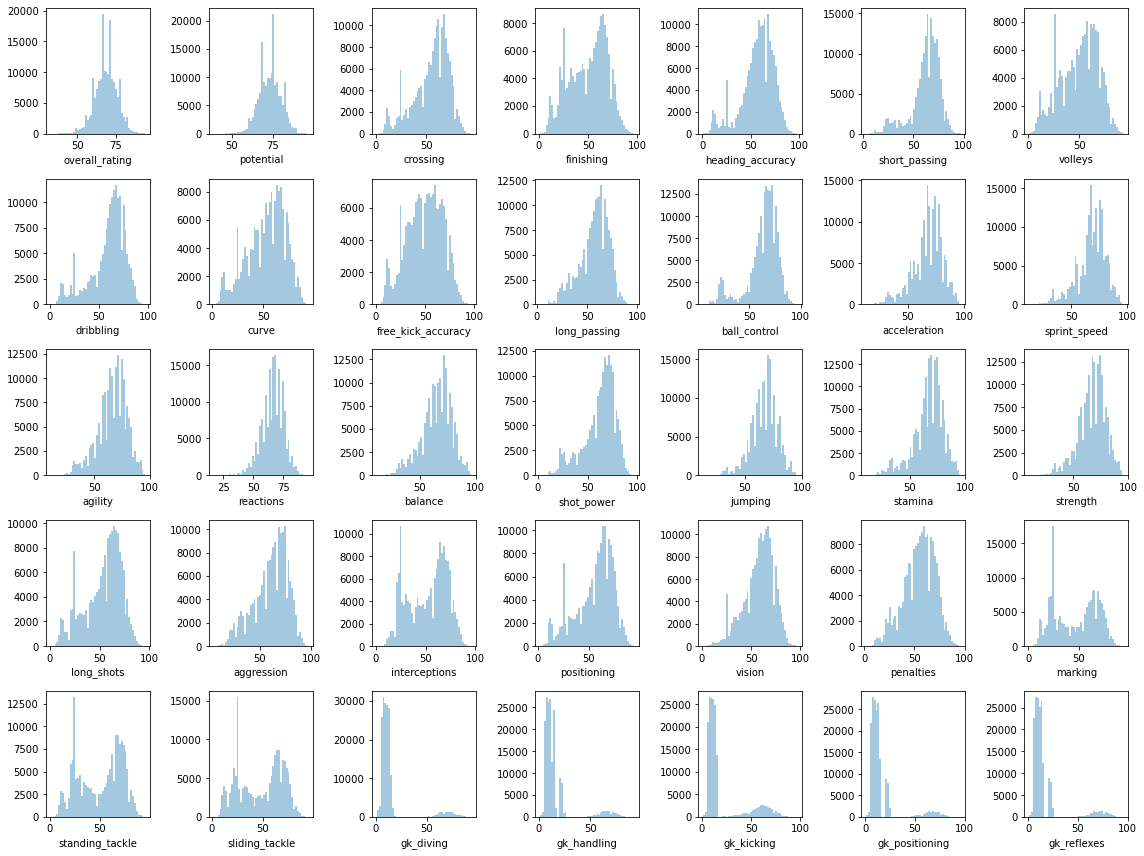

In [96]:
# which features should we really use in a table with that much features ??

pat = player_att_table.loc[:,player_att_table.columns.tolist()[3:]]
fig5, ax5 = plt.subplots(nrows=5,ncols=7)
fig5.set_size_inches(16,12)
for i,j in enumerate(player_att_table.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])
fig5.tight_layout()

<p>We can try to check if there is a major difference in the skills based on the prefered foot.</p>
<p>After analysing it, even though there are some outliers, there is not really a difference by prefering on or another.</p>
<p>Of course we are assuming that the players use more or almost always its preferred foot</p>

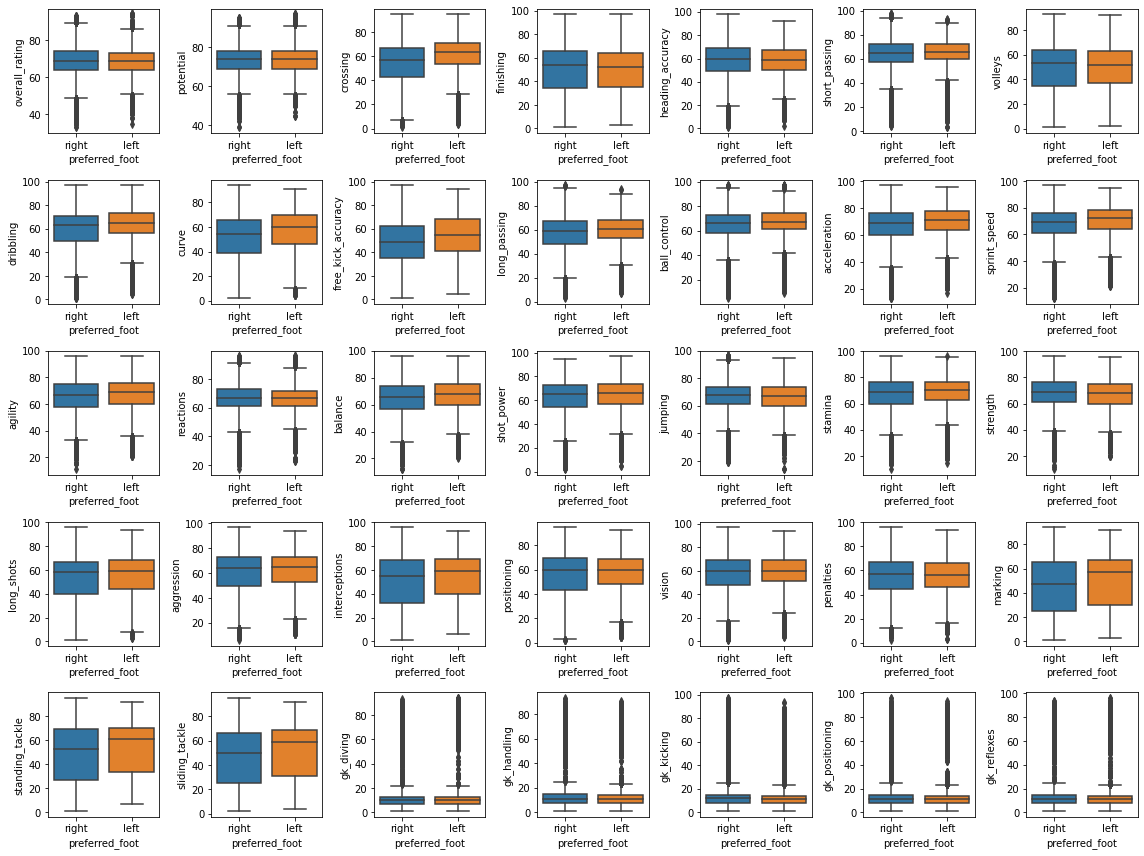

In [106]:
fig6, ax6 = plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])
fig6.tight_layout()

<p>We can also check the relatioons between the attacking rate and the features</p>
<p>As expected the skills that relate more to the skills of forwards</p>
<p>And some defensive skills when are low they are also related to more attacking</p>

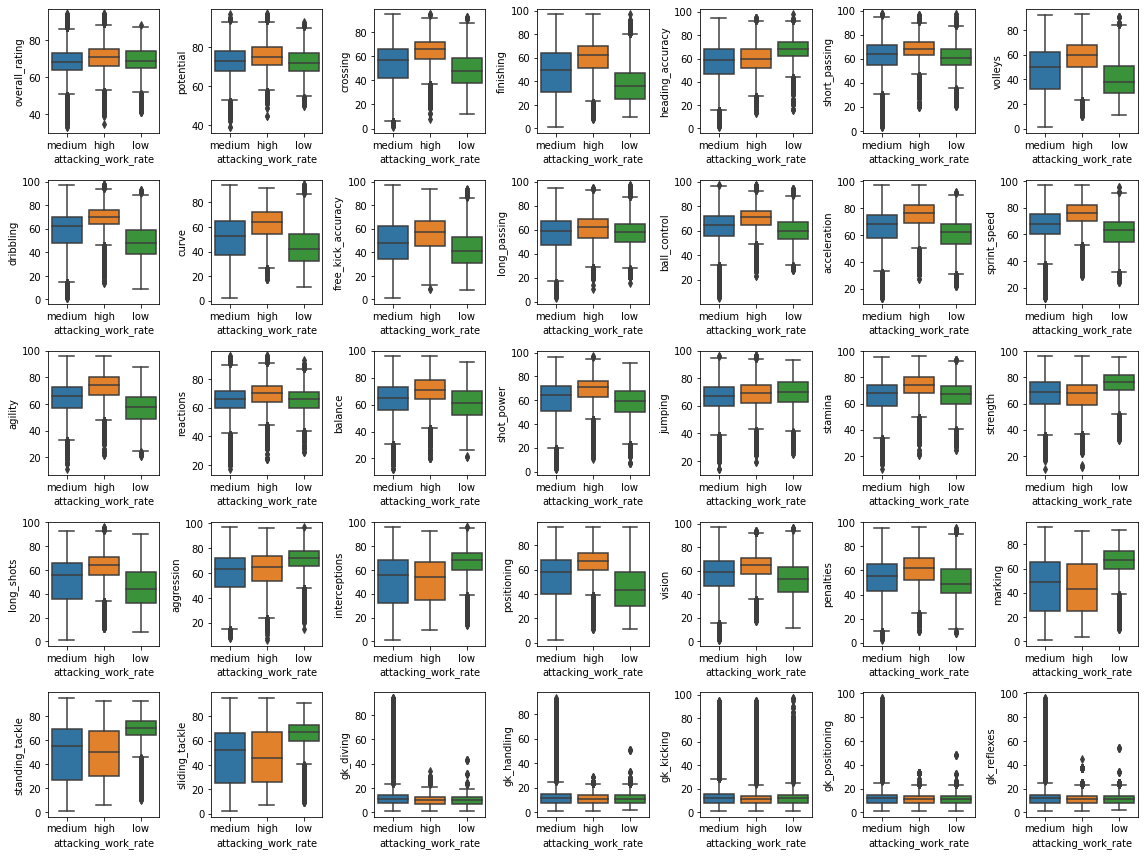

In [107]:
## relation between the attacking rate and the features
fig7, ax7 = plt.subplots(nrows=5,ncols=7)
fig7.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "attacking_work_rate", y = j, data= pat, ax = ax7[int(i/7)][i%7])
fig7.tight_layout() 

<p>After seeing the relations with the attacking rate, we can also check for the defensive rate</p>
<p>It seems interesting that the goalkeepers skills have low defensive work rate. This may occur since they are not a very good number of goalkeepers in comparison with other positions<p/>
<p>We can see the label high in the deffensive skills, as expected, are related, however, even in the forward related skills seem to help a bit, having values between 50 and 80</p>

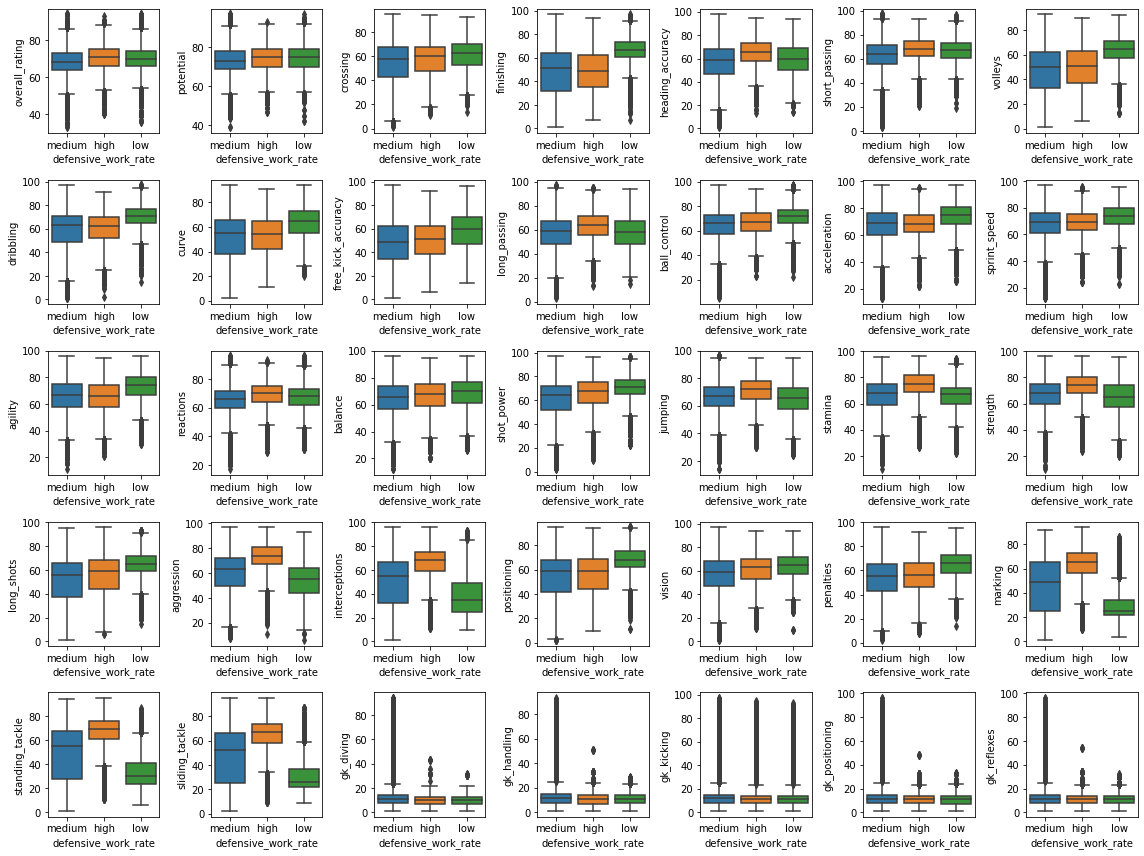

In [108]:
## relation between the defensive rate and the features
fig8, ax8 = plt.subplots(nrows=5,ncols=7)
fig8.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "defensive_work_rate", y = j, data= pat, ax = ax8[int(i/7)][i%7])
fig8.tight_layout()

### Team Table analysis

<p>Even though this table has not any duplicates. It has eleven rows with null values</p>

In [64]:
#Analyse team table
print("Dimension of Team Table is: {}".format(team_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(team_table.info())
print(100*"-")
print(team_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(team_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(team_table.isnull().sum(axis=0))
print("-Number of nulls :{}".format(team_table.isna().sum().sum()))
print("Duplicated columns: {}". format(team_table.duplicated().sum()))


Dimension of Team Table is: (299, 5)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  299 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
----------------------------------------------------------------------------------------------------
       team_long_name team_short_name
count             299             299
unique            296             259
top     Polonia Bytom             GRA
freq                2               3
------------------------------------------------

<h3>Cleaning the values</h3>
<p>To clean the values we opt to drop the values with null for two reasons: </p>
<ul>
    <li>There were missing values that do not make sense to take the average or using the last row since some columns must be unique  and others correspond to the team which we can not use some algorithm to guess</li>
    <li>They were just a few columns with null making the number of deleted rows less than 5%</li>
<ul>

In [6]:
team_table_updated = team_table[~team_table.loc[:,'team_fifa_api_id'].isnull()]
print("Dimension of Team Table is: {}".format(team_table_updated.shape))

Dimension of Team Table is: (288, 5)


<p style = "font-size:medium;">Surprisingly, We found some duplicated values in the column team_fifa_api_id</p>
<p style = "font-size:medium;">Since there are only 6 rows with that problem, we decided to drop them</p>



In [7]:
print("The feature team_fifa_api_id does not have duplicates? {}".format(team_table_updated['team_fifa_api_id'].is_unique)) 
print("The feature team_api_id does not have duplicates? {}".format(team_table_updated['team_api_id'].is_unique)) 
team_table_updated[team_table_updated.duplicated(['team_fifa_api_id'], keep=False)]


The feature team_fifa_api_id does not have duplicates? False
The feature team_api_id does not have duplicates? True


id  team_api_id  team_fifa_api_id        team_long_name  \
15      16         9996          111560.0  Royal Excel Mouscron   
24    2510       274581          111560.0  Royal Excel Mouscron   
182  31444         8031          111429.0         Polonia Bytom   
183  31445         8020          111429.0         Polonia Bytom   
189  31451         8244             301.0           Widzew Łódź   
199  32409         8024             301.0           Widzew Łódź   

    team_short_name  
15              MOU  
24              MOP  
182             POB  
183             GOR  
189             LOD  
199             WID

In [11]:
team_table_updated= team_table_updated.drop(team_table_updated[team_table_updated.duplicated(['team_fifa_api_id'])].index)
print("The feature team_fifa_api_id does not have duplicates? {}".format(team_table_updated['team_fifa_api_id'].is_unique)) 
print("Dimension of Team Table is: {}".format(team_table_updated.shape))

The feature team_fifa_api_id does not have duplicates? True
Dimension of Team Table is: (285, 5)


### Match Table anaysis
<p> Even though, there are not duplicated values, there are a lot of null values</p>

In [103]:
## Analyse team attribute tables
print("Dimension of Team Attributes Table is: {}".format( match_table.shape))
print(100*"-")
print("- Basic table info: \n")
print( match_table.info())
print(100*"-")
print( match_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print( match_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print( match_table.isnull().sum(axis=0))
print("-Number of nulls :{}".format( match_table.isna().sum().sum()))
print("Duplicated columns: {}". format( match_table.duplicated().sum()))

Dimension of Team Attributes Table is: (25979, 115)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
----------------------------------------------------------------------------------------------------
           season                 date      goal      shoton      shotoff  \
count       25979                25979     14217       14217        14217   
unique          8                 1694     13225        8464         8464   
top     2015/2016  2009-04-11 00:00:00  <goal />  <shoton />  <shotoff />   
freq         3326                   60       993        5754         5754   

            foulcommit      card      cross      corner      possession  
count            14217     14217      14217       14217           14217  
unique      

<h3>Clean the values </h3>
<p>Making all the cells with valid values. We used the mean since there are quite a few number of rows with null values and we did not want to lose the non null values of those</p>

In [104]:
# player_att_table = player_att_table.dropna(how='any')
for column in match_table:
    if match_table[column].isnull().values.any():
        match_table.fillna(match_table[column].mean(), inplace=True)

print("Number of nulls :{}".format(match_table.isna().sum().sum()))
print("Duplicated columns: {}". format(match_table.duplicated().sum()))

Number of nulls :0
Duplicated columns: 0


<h2>Team attributes analysis</h2>
<p>The tables does not have any duplicates columns</p>
<p>However the table has more than 900 null values which surprisingly occur in the same column: buildUpPlayDribbling</p>

In [135]:
## Analyse team attribute tables
print("Dimension of Team Attributes Table is: {}".format(team_att_table.shape))
print(100*"-")
print("- Basic table info: \n")
print(team_att_table.info())
print(100*"-")
print(team_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"-")
print("- Table statistics: \n")
print(team_att_table.describe())
print(100*"-")
print("- Check the number of nulls: \n")
print(team_att_table.isnull().sum(axis=0))
print("-Number of nulls :{}".format(team_att_table.isna().sum().sum()))
print("Duplicated columns: {}". format(team_att_table.duplicated().sum()))


Dimension of Team Attributes Table is: (1458, 25)
----------------------------------------------------------------------------------------------------
- Basic table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-nul

<h3>Clean values</h3>
<p>Since the majority of rows had null values we could not simply discard every line</p>
<p>After observing that more than 60% of the rows had null values in the buildUpPlayDribbling we only needed to manage this column. Since the majority of the values were null We opt to drop the column instead of replace with the mean since it could gives us the wrong information because of the lack of it</p>

In [136]:
# manage row with null values
team_att_table_updated1 = team_att_table.drop(['buildUpPlayDribbling'],axis = 1)
print("Dimension of Team Attributes Table updated is: {}".format(team_att_table_updated1.shape))

Dimension of Team Attributes Table updated is: (1458, 24)


<p>Every feature looks distributed in the domain making hard to find a relation between the variables</p>

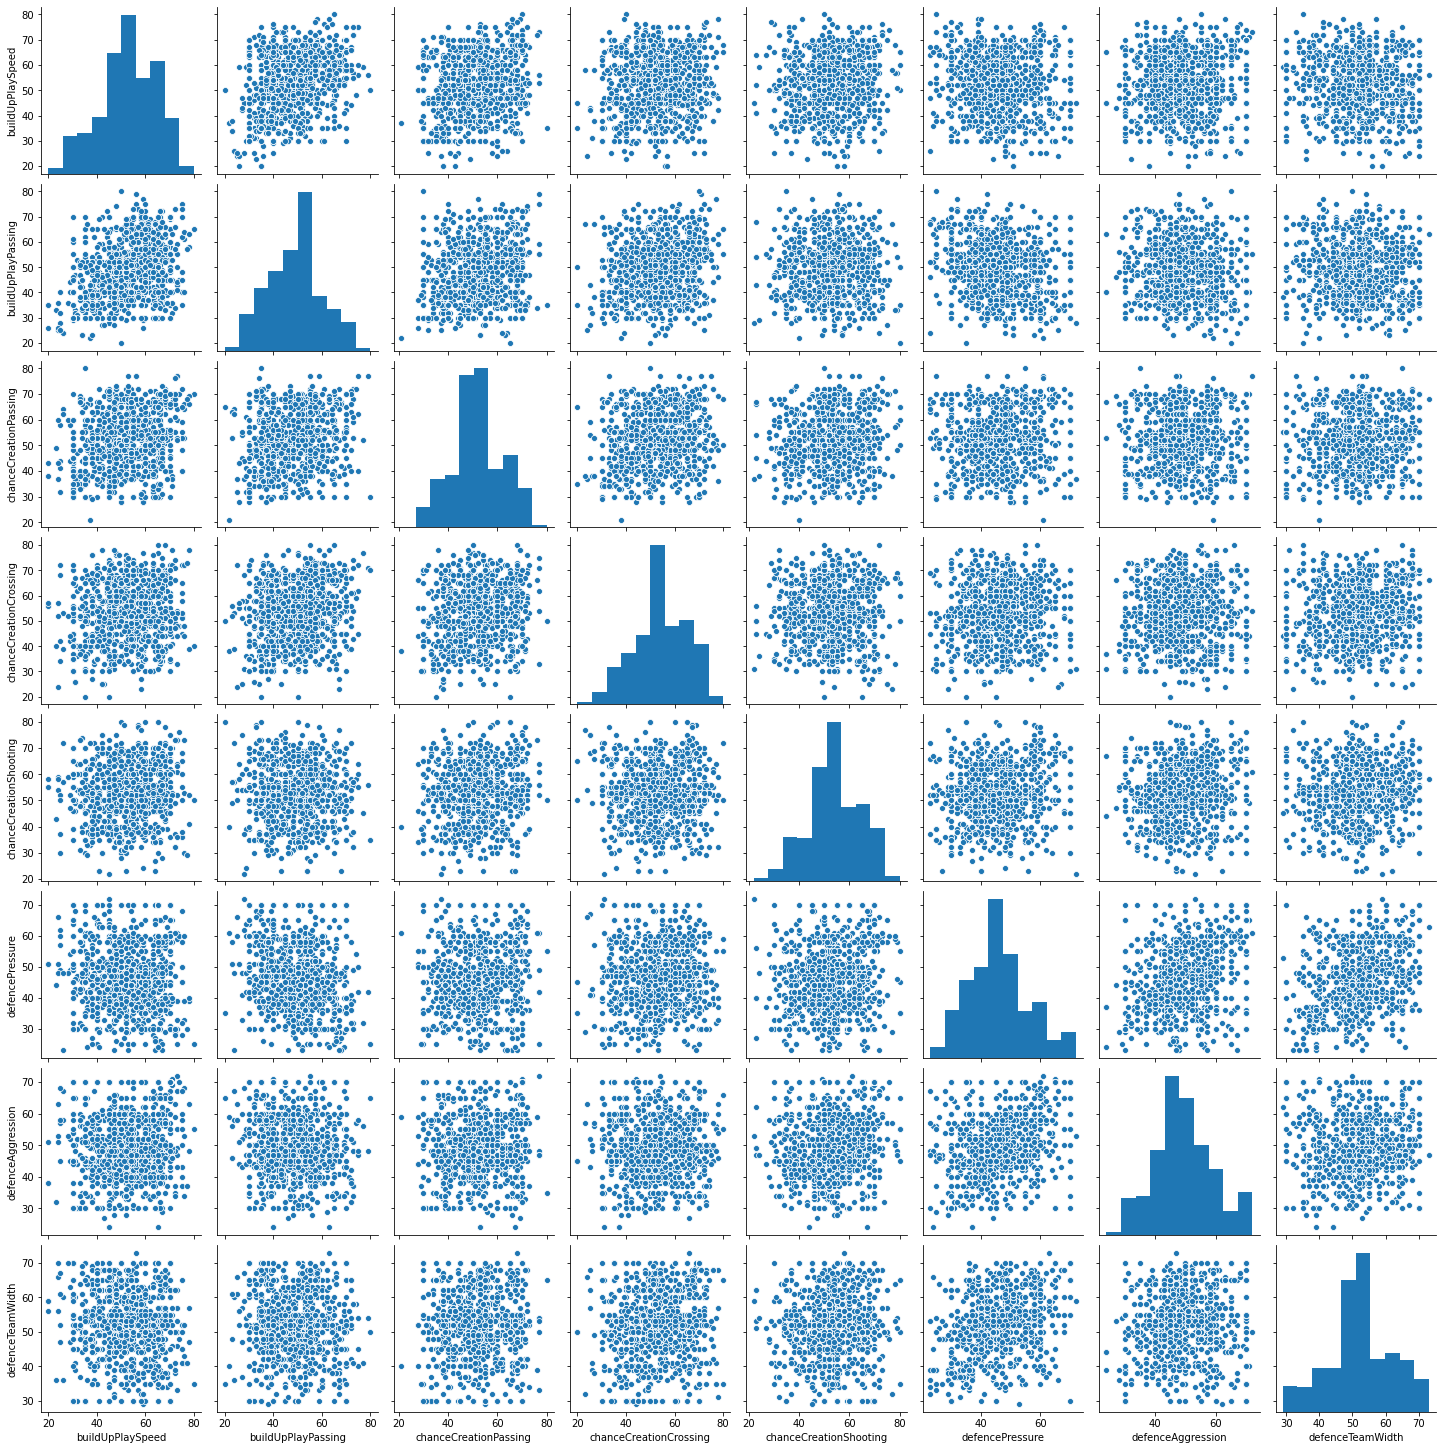

In [146]:
tat = team_att_table_updated1.loc[:,team_att_table_updated1.columns.tolist()[3:]]
sns.pairplot(tat)

 <p>We can check that none of the continuous features are normaly distributted or appear to follow exponential family distributions</p>

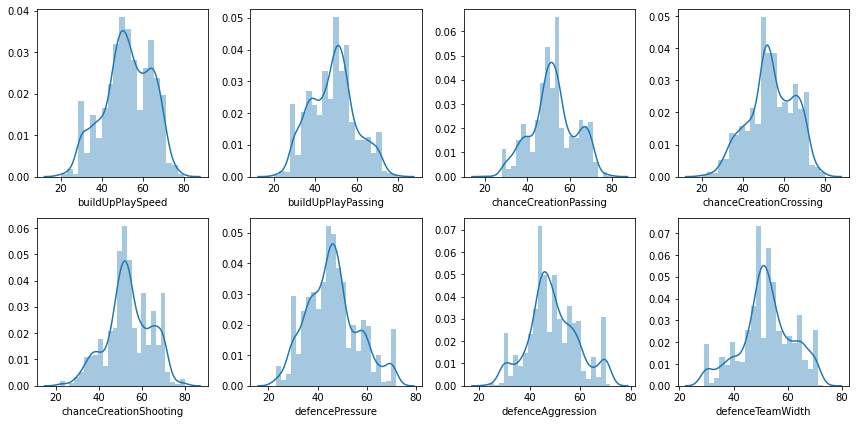

In [147]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.distplot(tat.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

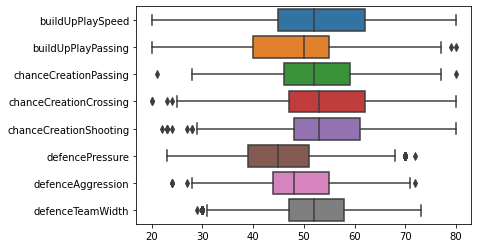

In [36]:
sns.boxplot(data = team_att_table_updated1.select_dtypes(include = ['int64']).iloc[:,3:],\
           orient = 'h')

<p>Making a similar anaylisis with discrete values</p>
<p>Some continuous and categorical features are duplicates of each other since the  categorical features do a nice job of separating its respective continuous feature</p>
<p>Speed can be used to distinguish the plot in different sections</p>

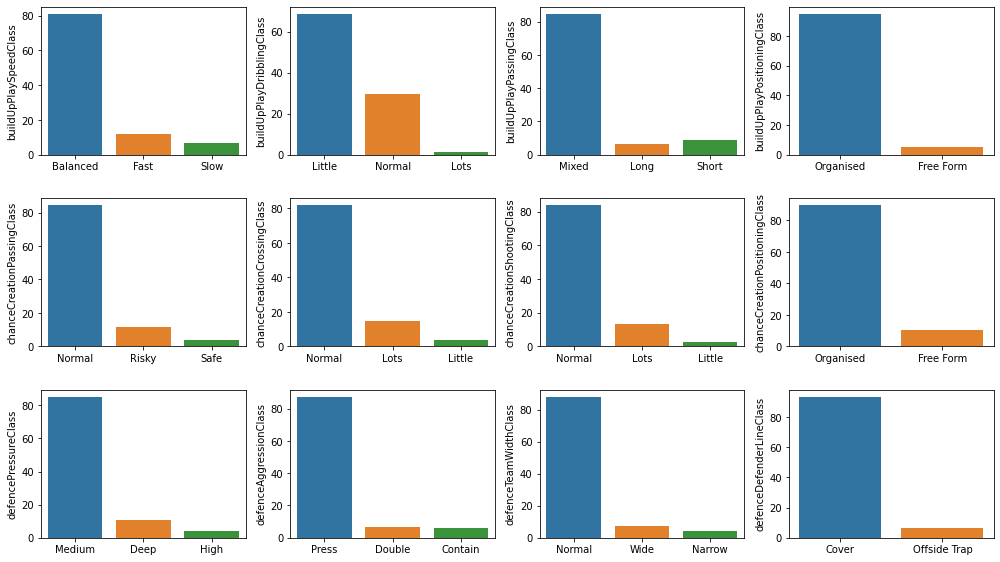

In [37]:
# we can make discrete values with it
fig9, ax9 = plt.subplots(nrows=3,ncols=4)
fig9.set_size_inches(14,8)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['object']).columns[1:].tolist()):
    #sns.countplot(tat.loc[:,j], ax = ax9[int(i/4)][i%4])
    sns.barplot(x = j, y = j, data = tat,\
            estimator = lambda x: len(x)/len(tat) * 100, ax = ax9[int(i/4)][i%4],\
           orient = 'v')
    ax9[int(i/4)][i%4].set(xlabel = "")
fig9.tight_layout()

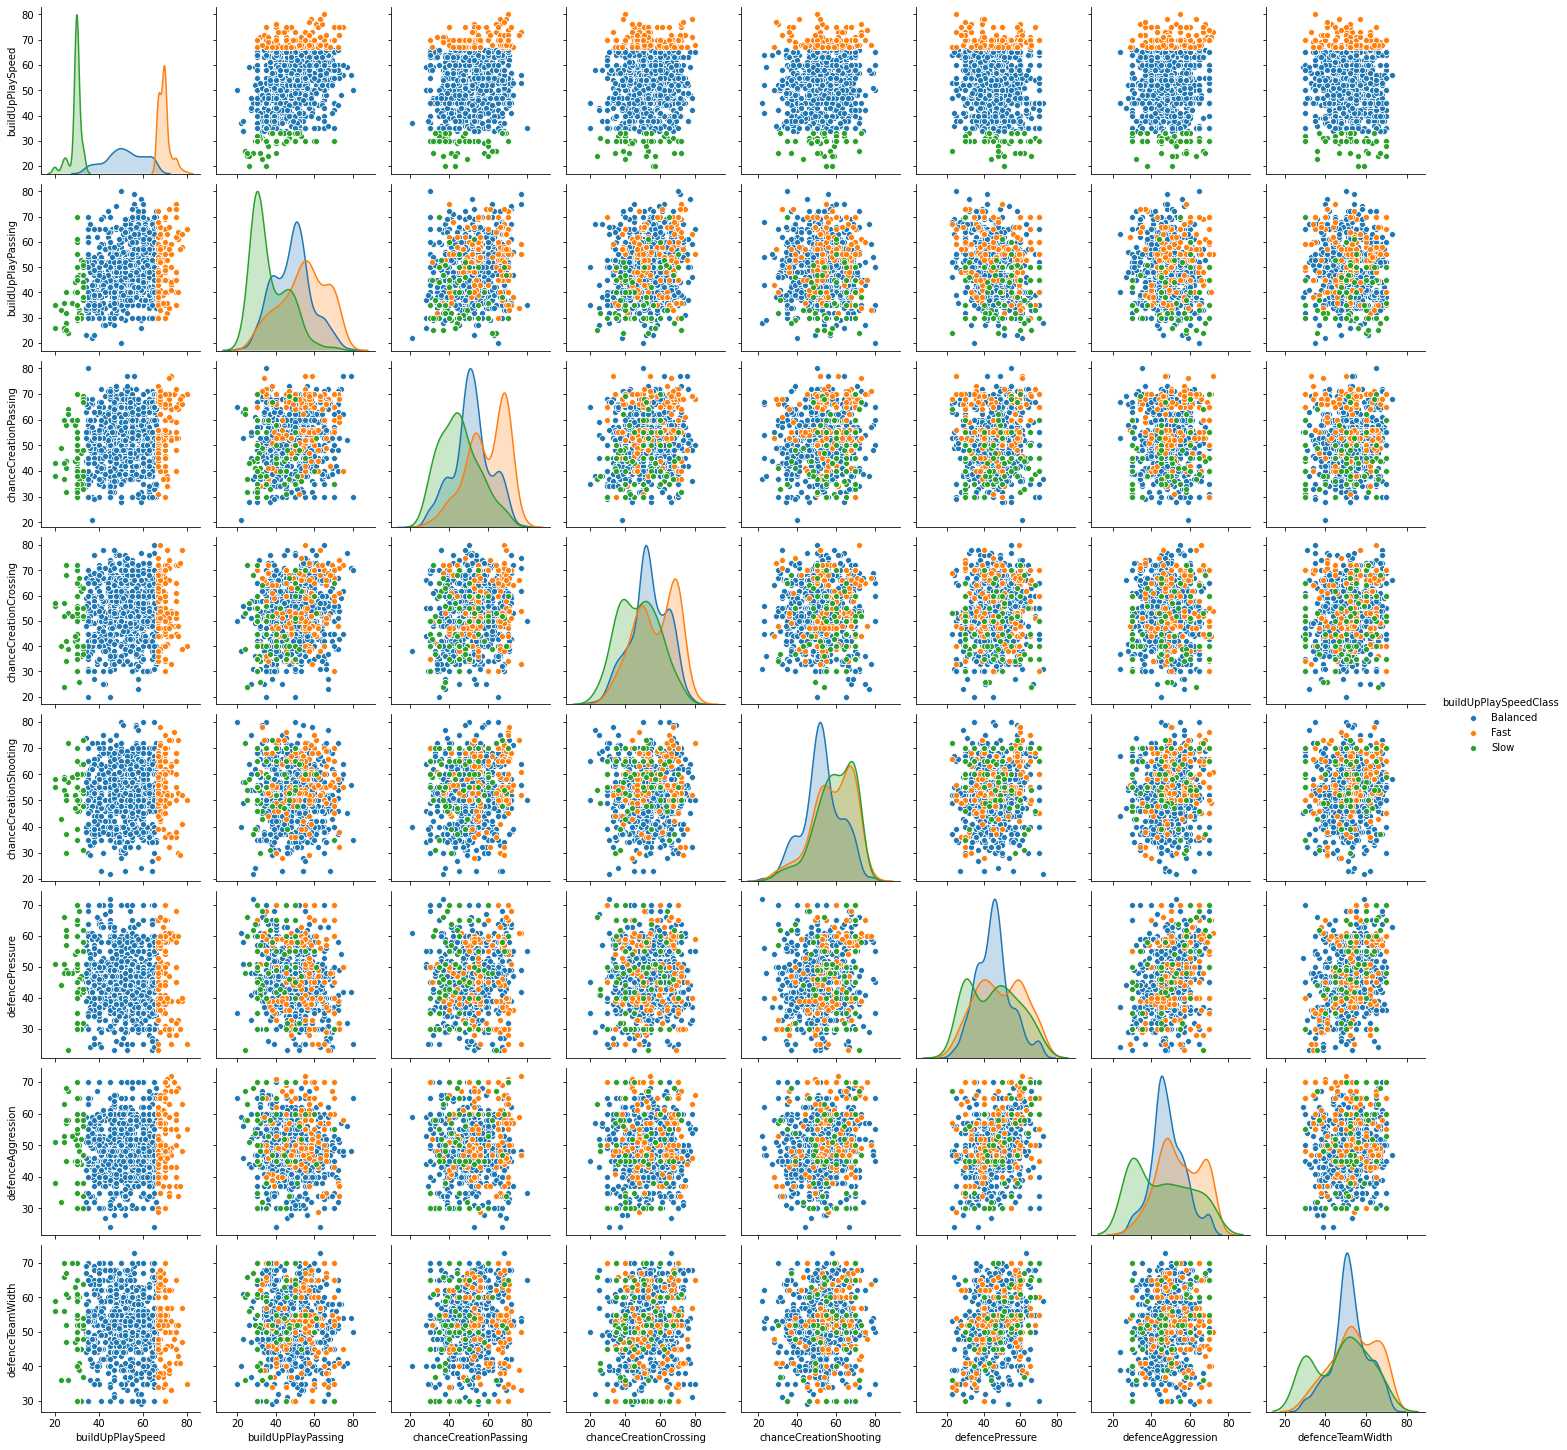

In [38]:
tat.select_dtypes(include = ['int64']).columns.tolist()
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[1]) 


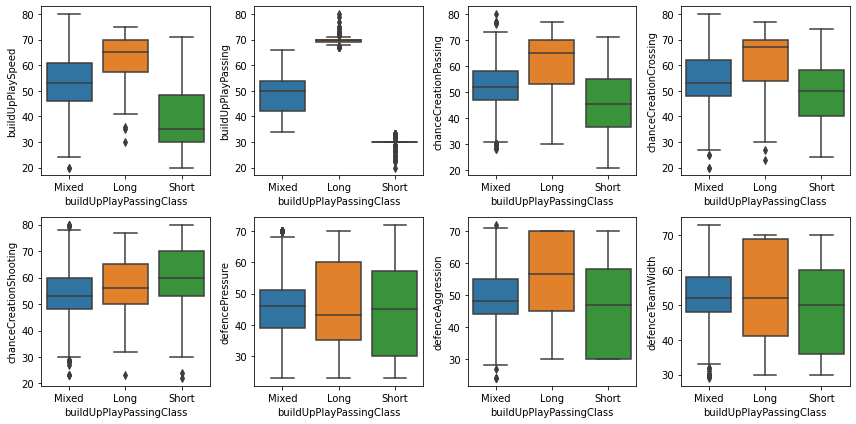

In [39]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.boxplot(data = tat, y = j, x = tat.select_dtypes(include = ['object']).columns[3],\
                                                      ax = ax9[int(i/4)][i%4])
fig9.tight_layout()


<h2>Let's join some tables and analyse the data</h2>

In [150]:
# league and match information
match_league = pd.read_sql("""SELECT m.country_id,lg.name,m.season,m.stage,m.date,m.match_api_id,m.home_team_api_id,m.away_team_api_id,m.home_team_goal,m.away_team_goal
                              FROM match m
                              JOIN league lg
                              ON m.league_id = lg.id""",con)
match_league.to_sql("match_league", con, if_exists="replace")
match_league['date'] = pd.to_datetime(match_league['date'])
match_league['winner'] = np.where(match_league['home_team_goal']> match_league['away_team_goal'],match_league['home_team_api_id'],match_league['away_team_api_id'])
match_league['winner'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],999999,match_league['winner'])
match_league['draw1'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],match_league['home_team_api_id'],999999)
match_league['draw2'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],match_league['away_team_api_id'],999999)

match_league.to_sql("match_league", con, if_exists="replace")
query = pd.read_sql("""SELECT *
                       FROM match_league
                       ;""",con)
query.head()

index  country_id                    name     season  stage  \
0      0           1  Belgium Jupiler League  2008/2009      1   
1      1           1  Belgium Jupiler League  2008/2009      1   
2      2           1  Belgium Jupiler League  2008/2009      1   
3      3           1  Belgium Jupiler League  2008/2009      1   
4      4           1  Belgium Jupiler League  2008/2009      1   

                  date  match_api_id  home_team_api_id  away_team_api_id  \
0  2008-08-17 00:00:00        492473              9987              9993   
1  2008-08-16 00:00:00        492474             10000              9994   
2  2008-08-16 00:00:00        492475              9984              8635   
3  2008-08-17 00:00:00        492476              9991              9998   
4  2008-08-16 00:00:00        492477              7947              9985   

   home_team_goal  away_team_goal  winner   draw1   draw2  
0               1               1  999999    9987    9993  
1               0               0  999999   10000    9994  
2               0               3    8635  999999  999999  
3               5               0    9991  999999  999999  
4               1               3    9985  999999  999999

In [42]:
# stats of the team
home_draw = pd.read_sql("""SELECT name,season,draw1,count(draw1) AS dh
                                   FROM match_league
                                   WHERE draw1 != 999999
                                   GROUP BY 1,2,3;""",con)
away_draw = pd.read_sql("""SELECT name,season,draw2,count(draw2) AS da
                                   FROM match_league m1
                                   WHERE draw2 != 999999
                                   GROUP BY 1,2,3;""", con)
winner_t = pd.read_sql("""SELECT name,season,winner,count(winner) AS w
                                   FROM match_league m1
                                   WHERE winner != 999999
                                   GROUP BY 1,2,3;""",con)
home_draw.to_sql("home_draw", con, if_exists="replace")
away_draw.to_sql("away_draw", con, if_exists="replace")
winner_t.to_sql("winner_t", con, if_exists="replace")

# stats of the player
attribute = pd.read_sql("""SELECT pa.date,pl.birthday,pl.player_api_id,pl.player_name,pa.acceleration,pa.sprint_speed,pa.stamina,pa.agility,pa.reactions,pa.preferred_foot
                           FROM player pl
                           JOIN player_Attributes pa
                           ON pl.player_api_id = pa.player_api_id;""",con)
attribute['date'] = pd.to_datetime(attribute['date'])
attribute['birthday'] = pd.to_datetime(attribute['birthday'])

attribute.to_sql("attribute_imp",con,if_exists="replace")

#Keeping most recent record of each player
attribute.drop_duplicates(subset=['player_api_id',],keep="first",inplace=True)
attribute.dropna(inplace=True)
attribute.to_sql("attribute_imp",con,if_exists="replace")

# age of the player

def num_years(start,curr):
    return(int((curr-start).days / 365.25))

query = pd.read_sql("""SELECT * FROM attribute_imp;""",con)
query['date'] = pd.to_datetime(query['date'])
query['birthday'] = pd.to_datetime(query['birthday'])
#query['age'] = (query['date'].dt.year)-(query['birthday'].dt.year)
query['age'] = query.apply(lambda x: num_years(x['birthday'], x['date']), axis = 1)

query.to_sql("attribute_imp",con,if_exists="replace")

<p>We can check that the age is positively correlated with reaction and negative correlated with other features</p>

Text(0.5, 1.0, 'Correlation Matrix Between Age and Various Attributes')

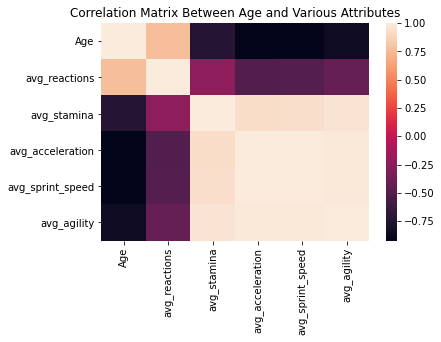

In [155]:
query1 = pd.read_sql("""  SELECT age AS Age,AVG(reactions) AS avg_reactions,AVG(stamina) AS avg_stamina
                          ,AVG(acceleration) AS avg_acceleration,AVG(sprint_speed) AS avg_sprint_speed
                          ,AVG(agility) AS avg_agility
                          FROM attribute_imp
                          GROUP BY 1
                          ORDER BY 1""",con)
corr = query1.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
ax.set_title("Correlation Matrix Between Age and Various Attributes")
# We can clearly see that Age has a strong negative correlation with average acceleration,average agility, average stamina and average sprint speed of the players whereas age shows a weak positive correlation with the average reactions of the players.

<p>In terms of prediction analysis later we might infer that ball control and short passing form a good fit.</p>

<p>Players with higher overall ratings are not always the players who can dribble well and this is true as several high rated players are defenders and goalkeepers whose strong suit is not dribbling. </p>

<p> Surprisingly there are a lot of players who despite having high Long Passing scores have low Short Passing scores</p>

Text(0.5, 1.0, 'Overall vs Potential')

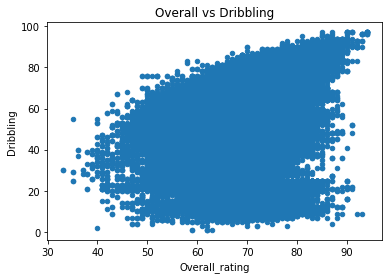

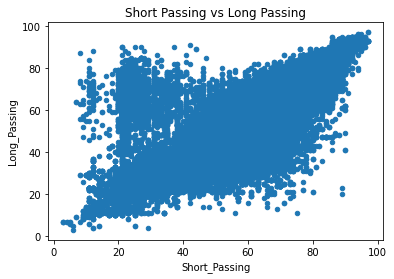

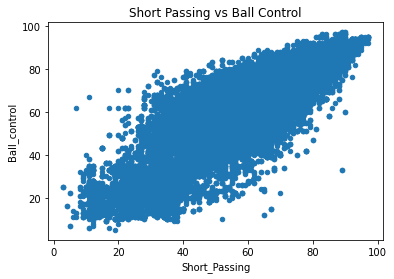

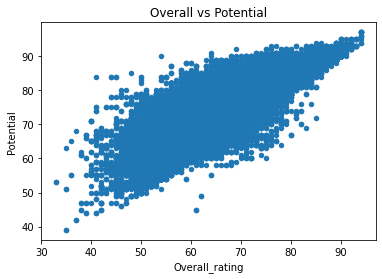

In [157]:

qu = pd.read_sql("""  SELECT overall_rating AS Overall_rating,potential AS Potential, dribbling AS Dribbling,
                        short_passing as Short_Passing, long_passing AS Long_Passing, ball_control AS Ball_control
                        FROM Player_Attributes
                        ORDER BY 1""",con)

ax = qu.plot(x="Overall_rating",y="Dribbling",kind="scatter")
ax.set_title("Overall vs Dribbling")

ax = qu.plot(x="Short_Passing",y="Long_Passing",kind="scatter")
ax.set_title("Short Passing vs Long Passing")

ax = qu.plot(x="Short_Passing",y="Ball_control",kind="scatter")
ax.set_title("Short Passing vs Ball Control")

ax = qu.plot(x="Overall_rating",y="Potential",kind="scatter")
ax.set_title("Overall vs Potential")

<p>While players get older the attributes which depend on the physical health of the player like Acceleration, Sprint Speed,  Agility and Stamina decreases but reactions increases somewhat </p>

Correlation of Reactions with Age:  0.7675305570880387
Correlation of Stamina with Age:  -0.7260835589278937
Correlation of Acceleration with Age:  -0.9199811468752116
Correlation of Sprint Speed with Age:  -0.9104739545625228
Correlation of Agility with Age:  -0.849583392075151


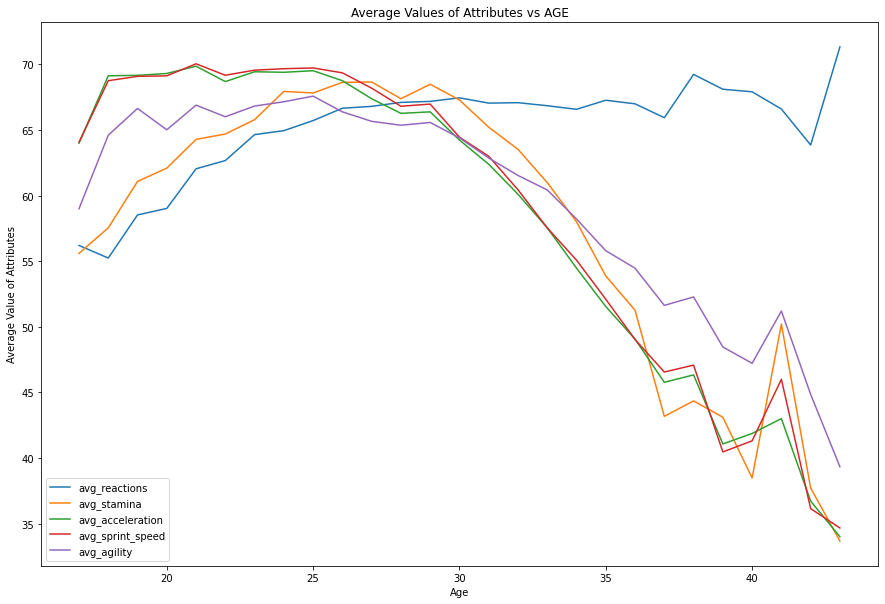

In [46]:
query1 = pd.read_sql("""  SELECT age AS Age,AVG(reactions) AS avg_reactions,AVG(stamina) AS avg_stamina
                          ,AVG(acceleration) AS avg_acceleration,AVG(sprint_speed) AS avg_sprint_speed
                          ,AVG(agility) AS avg_agility
                          FROM attribute_imp
                          GROUP BY 1
                          ORDER BY 1""",con)
ax = query1.plot(x="Age", y=["avg_reactions", "avg_stamina", "avg_acceleration","avg_sprint_speed","avg_agility"], kind="line",figsize=(15,10))

ax.set_ylabel("Average Value of Attributes")
ax.set_title("Average Values of Attributes vs AGE")
print("Correlation of Reactions with Age: ",query1['Age'].corr(query1['avg_reactions']))
print("Correlation of Stamina with Age: ",query1['Age'].corr(query1['avg_stamina']))
print("Correlation of Acceleration with Age: ",query1['Age'].corr(query1['avg_acceleration']))
print("Correlation of Sprint Speed with Age: ",query1['Age'].corr(query1['avg_sprint_speed']))
print("Correlation of Agility with Age: ",query1['Age'].corr(query1['avg_agility']))

<h3>Home vs Away</h3>
<p>As expected teams score more when they are playing home</p>

name  HOME  AWAY
0  England Premier League  4715  3525
1          France Ligue 1  4265  3162
2   Germany 1. Bundesliga  3982  3121
3           Italy Serie A  4528  3367
4         Spain LIGA BBVA  4959  3453

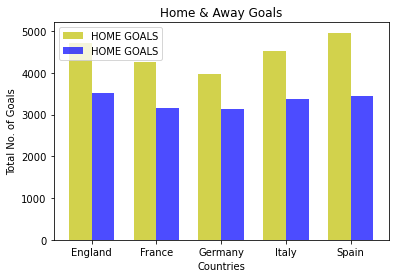

In [47]:
# play in home vs away
query = pd.read_sql("""SELECT name,SUM(home_team_goal) as HOME,SUM(away_team_goal) AS AWAY
                        FROM match_league
                        WHERE name IN ("France Ligue 1","England Premier League","Spain LIGA BBVA","Germany 1. Bundesliga","Italy Serie A")
                        GROUP BY 1""",con)

ind = np.arange(5)
width = 0.35

hm = plt.bar(ind, query['HOME'],width,color='y',alpha=0.7,label='HOME GOALS')
aw = plt.bar(ind+width, query['AWAY'],width,color='b',alpha=0.7,label='HOME GOALS')
plt.ylabel('Total No. of Goals')
plt.xlabel('Countries')
plt.title('Home & Away Goals')
locations = ind+width / 2
labels = ["England","France","Germany","Italy","Spain"]
plt.xticks(locations,labels)
plt.legend()
query


<h3>Unpredictability</h3>
<p>Ligue 1 seems most unpredictable: a bottom 5 team gets a favourable outcome against a Top 5 team most often in this league.</p>
<p>Germany has a general high unpredictableness but it may be due to the reason that I have considered the Top and Bottom 5 even though this league has only 18 teams each season</p>

Average Unpredictability: 
 English Premier League     9.50000
France Ligue 1            11.40625
Germany 1. Bundesliga     10.50000
Italy Serie A              9.65625
Spain LIGA BBVA            9.78125
dtype: float64


English Premier League  France Ligue 1  Germany 1. Bundesliga  \
2008/2009                    7.75           11.50                  10.25   
2009/2010                    9.50           10.50                   9.75   
2010/2011                   11.75           11.25                  14.50   
2011/2012                    7.75           13.50                  10.25   
2012/2013                   13.00           13.25                   8.75   
2013/2014                    7.00            9.50                  10.75   
2014/2015                    8.75            8.25                  10.50   
2015/2016                   10.50           13.50                   9.25   

           Italy Serie A  Spain LIGA BBVA  
2008/2009           9.50            14.00  
2009/2010           9.25            10.50  
2010/2011          11.75            15.75  
2011/2012           8.50             8.00  
2012/2013           6.25             8.00  
2013/2014          10.75             7.50  
2014/2015          12.00             6.00  
2015/2016           9.25             8.50

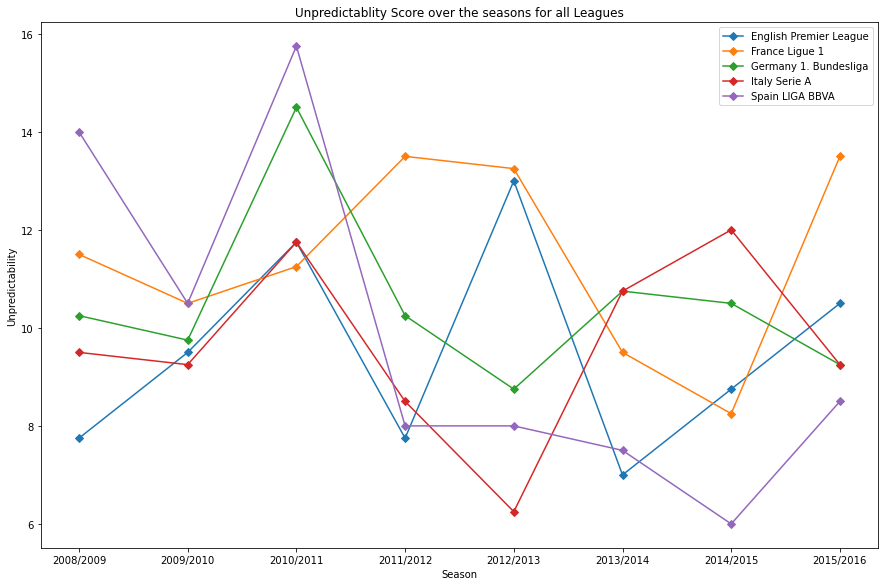

In [51]:
## league tables
query = pd.read_sql("""SELECT hd.name,hd.season,hd.draw1 AS Team_id,hd.dh+ad.da+3*wi.w AS Points
                       FROM home_draw hd
                       JOIN away_draw ad
                       ON hd.name = ad.name AND hd.season=ad.season AND hd.draw1=ad.draw2
                       JOIN winner_t wi
                       ON hd.name = wi.name AND hd.season=wi.season AND hd.draw1 = wi.winner
                       WHERE hd.name LIKE "England Premier League" OR hd.name LIKE "France Ligue 1" OR 
                       hd.name LIKE "Germany 1. Bundesliga" OR hd.name LIKE "Italy Serie A" OR
                       hd.name LIKE "Spain LIGA BBVA" 
                       ORDER BY 1,2,4 DESC;""",con)
query.to_sql("league_tables",con,if_exists="replace")

#Evaluating head-to-head scores to find the Unpredictability of each league
query = pd.read_sql("""SELECT * FROM league_tables;""",con)
lar = (query.groupby(['name','season'],group_keys=False)).apply(lambda x: x.nlargest(5,'Points'))

sma=(query.groupby(['name','season'],group_keys=False)).apply(lambda x: x.nsmallest(5,'Points'))

query1 = pd.read_sql("""SELECT * FROM match_league
                        WHERE name IN ("France Ligue 1","England Premier League","Spain LIGA BBVA","Germany 1. Bundesliga","Italy Serie A")
                        ORDER BY name,date;""",con)
l=0

c=[0]*40
ss = []
for k in range(0,200,5):
    for i in range(k,k+5):
        for j in range(k,k+5):
            sid = sma.iloc[i,3] #Team_id of one of the Bottom 5
            lid = lar.iloc[j,3] #Team_id of one of the Top 5
            s=sma.iloc[i,2]     #Season for which we are evaluating
            ss.append(s)
            #When bottom 5 teams plays the Top 5 teams at their home
            a = query1.loc[query1.home_team_api_id == sid] #Filtering by home team
            b = a.loc[(query1.away_team_api_id == lid)]    #Filtering by away team
            d = b.loc[(query1.season == s)]                #Filtering by season
           
            if((not d.empty)):
                if((d.iloc[0,11]==sid)):
                    c[l] = c[l] + 1
                elif((d.iloc[0,11]==999999)):
                    c[l] = c[l] + 0.5
                
            #When bottom 5 teams plays the Top 5 teams away
            a = query1.loc[query1.home_team_api_id == lid]
            b = a.loc[(query1.away_team_api_id == sid)]
            d = b.loc[(query1.season == s)]
            if((not d.empty)):
                if((d.iloc[0,11]==sid)):
                    c[l] = c[l] + 1.25
                elif((d.iloc[0,11]==999999)):
                    c[l] = c[l] + 0.5
            
            
    l=l+1
    
from collections import OrderedDict
a=list(OrderedDict.fromkeys(ss))
df = {'English Premier League':pd.Series(data=c[0:8],index=a),
      'France Ligue 1':pd.Series(data=c[8:16],index=a),
      'Germany 1. Bundesliga':pd.Series(data=c[16:24],index=a),
      'Italy Serie A':pd.Series(data=c[24:32],index=a),
      'Spain LIGA BBVA':pd.Series(data=c[32:40],index=a)}
df=pd.DataFrame(df)
ax = df.plot(figsize=(15,10),marker='D')
ax.set_xlabel("Season")
ax.set_ylabel("Unpredictability")
ax.set_title("Unpredictablity Score over the seasons for all Leagues")
x= [0, 1, 2, 3, 4, 5, 6, 7]
labels =['2008/2009','2009/2010','2010/2011','2011/2012','2012/2013','2013/2014','2014/2015','2015/2016']
plt.xticks(x,labels)
plt.subplots_adjust(bottom=0.15)
print("Average Unpredictability: \n",df.mean(axis=0))

<h3>League matches</h3>
<p>As expected different leagues have different number of matches, having the most matches the france ligue, premier league and liga bbva.</p>
<p>Portugal has almost less than a thousand games than the leagues with more games</p>

In [158]:
# merge country and league data
countries_leagues = country_table.merge(league_table,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

matches_new = match_table[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#data.isnull().sum()
#data.nunique()

c:\users\joão abelha\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1622: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


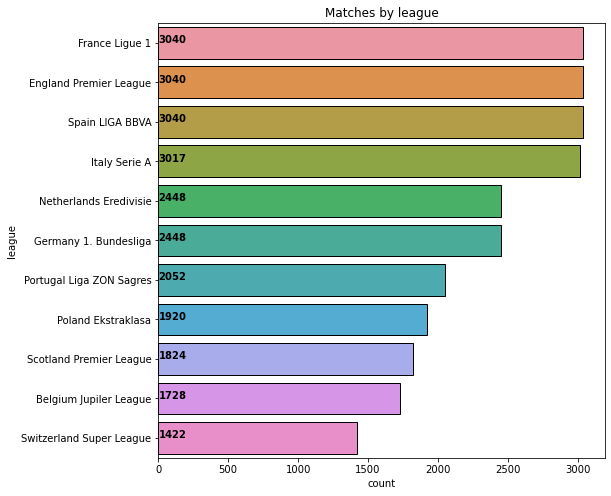

In [159]:
#number of matches in the different leagues
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

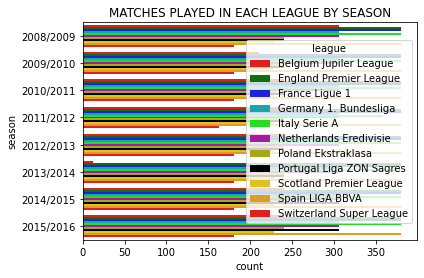

In [160]:
# matches in each league by season
sns.countplot(y = data["season"],hue=data["league"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("MATCHES PLAYED IN EACH LEAGUE BY SEASON")
plt.show()

In [161]:
# merge with team data
data = data.merge(team_table,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})



<h3>Goals</h3>
<p>A global overview of goals distribution</p>

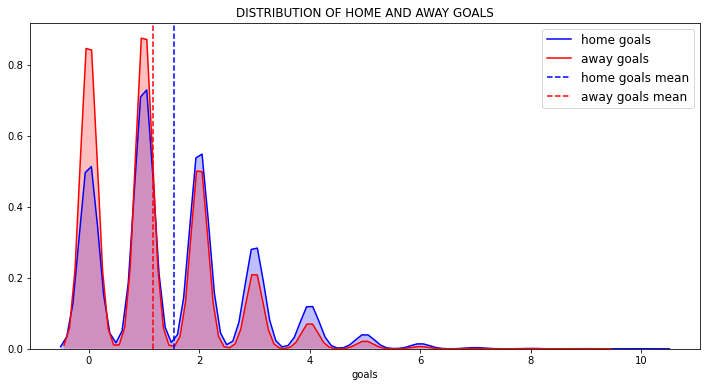

In [162]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["home_team_goal"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["away_team_goal"],shade=True,
            color="r",label="away goals")
plt.axvline(data["home_team_goal"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["away_team_goal"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

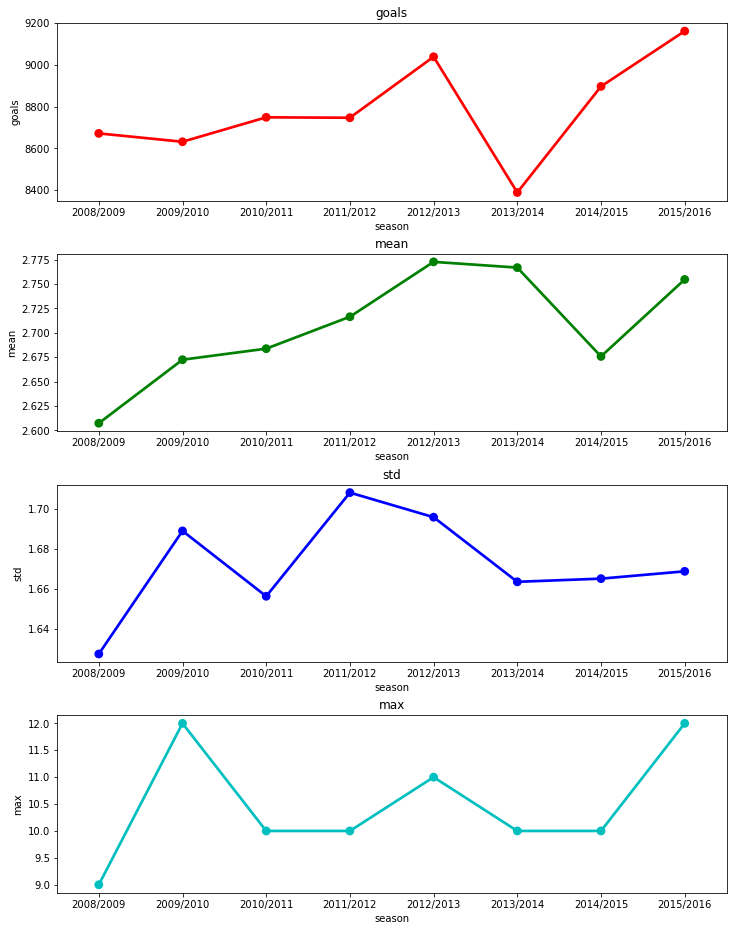

In [163]:
# goals each year

data["total_goal"] = data["home_team_goal"]+data["away_team_goal"]
a = data.groupby("season").agg({"total_goal":"sum"})
m = data.groupby("season").agg({"total_goal":"mean"})
s = data.groupby("season").agg({"total_goal":"std"})
x = data.groupby("season").agg({"total_goal":"max"})
xx = a.merge(m,left_index=True,right_index=True,how="left")
yy = s.merge(x,left_index=True,right_index=True,how="left")
x_y = xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()
x_y = x_y.rename(columns={'total_goal_x_x':"goals", 'total_goal_y_x':"mean",
                          'total_goal_x_y':"std",'total_goal_y_y':"max"})
import itertools
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 
plt.figure(figsize=(12,16))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(length,length/length,j+1)
    sns.pointplot(x_y["season"],x_y[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace =.3)

### Classification observation
<p> Since we want to predict three different outcomes with have to make sure that we have sufficient information for each one in comparison with another one so that our predications are accurate </p>
<p> If we did have only 5% of games that ended up with draws our model would probabily end up not being able to spot this outcome so well since it would not be as favorable as the more weighted labels since accuracy would no favor this outcome. So we have to beware rare events we also need to predict</p>

In [69]:
counter = {'win': 0 , 'draw':0 , 'lost':0}
def label(data, counter):
 
    if data["home_team_goal"] > data["away_team_goal"]:
        counter['win']+=1
    elif data["away_team_goal"] > data["home_team_goal"]:
        counter['lost']+=1
    elif data["home_team_goal"] == data["away_team_goal"]:
        counter['draw']+=1
    

match_table.apply(lambda data:label(data, counter ),axis=1)

total_games = counter['win'] + counter['lost'] + counter['draw']

print("Percentage of winning games for the home team: {:.2f}".format(counter['win'] / total_games))
print("Percentage of draw games for the home team: {:.2f}".format(counter['draw'] / total_games))
print("Percentage of lost game for the home team: {:.2f}".format(counter['lost'] / total_games))


Percentage of winning games for the home team: 0.46
Percentage of draw games for the home team: 0.25
Percentage of lost game for the home team: 0.29


### Joinning all the tables and adding some interesting columns

In [136]:
#Merge country and league data
countries_leagues = country_table.merge(league_table,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

'''
matches_new = match_table[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]
'''
matches_new = match_table.drop("id",axis=1)

#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")

#Merge team data
data = data.merge(team_table,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})

data = data.merge(team_table,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns


#add this column
data["total_goal"] = data["home_team_goal"]+data["away_team_goal"]

############# add columns for win, lose and draw #####################
def label(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return 1
    elif data["away_team_goal"] > data["home_team_goal"]:
        return 2
    elif data["home_team_goal"] == data["away_team_goal"]:
        return 3
    
data["win"] = data.apply(lambda data:label(data),axis=1)

############# add columns for win, lose and draw #####################



data.head()



country_id  league_id     season  stage                 date  match_api_id  \
0           1          1  2008/2009      1  2008-08-17 00:00:00        492473   
1           1          1  2008/2009      1  2008-08-16 00:00:00        492474   
2           1          1  2008/2009      1  2008-08-16 00:00:00        492475   
3           1          1  2008/2009      1  2008-08-17 00:00:00        492476   
4           1          1  2008/2009      1  2008-08-16 00:00:00        492477   

   home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
0              9987              9993               1               1   
1             10000              9994               0               0   
2              9984              8635               0               3   
3              9991              9998               5               0   
4              7947              9985               1               3   

   home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
0        0.999586        0.999586        0.999586        0.999586   
1        0.999586        0.999586        0.999586        0.999586   
2        0.999586        0.999586        0.999586        0.999586   
3        0.999586        0.999586        0.999586        0.999586   
4        0.999586        0.999586        0.999586        0.999586   

   home_player_X5  home_player_X6  home_player_X7  home_player_X8  \
0        0.999586        0.999586        0.999586        0.999586   
1        0.999586        0.999586        0.999586        0.999586   
2        0.999586        0.999586        0.999586        0.999586   
3        0.999586        0.999586        0.999586        0.999586   
4        0.999586        0.999586        0.999586        0.999586   

   home_player_X9  home_player_X10  home_player_X11  away_player_X1  \
0        0.999586         0.999586         0.999586        0.999586   
1        0.999586         0.999586         0.999586        0.999586   
2        0.999586         0.999586         0.999586        0.999586   
3        0.999586         0.999586         0.999586        0.999586   
4        0.999586         0.999586         0.999586        0.999586   

   away_player_X2  away_player_X3  away_player_X4  away_player_X5  \
0        0.999586        0.999586        0.999586        0.999586   
1        0.999586        0.999586        0.999586        0.999586   
2        0.999586        0.999586        0.999586        0.999586   
3        0.999586        0.999586        0.999586        0.999586   
4        0.999586        0.999586        0.999586        0.999586   

   away_player_X6  away_player_X7  away_player_X8  away_player_X9  \
0        0.999586        0.999586        0.999586        0.999586   
1        0.999586        0.999586        0.999586        0.999586   
2        0.999586        0.999586        0.999586        0.999586   
3        0.999586        0.999586        0.999586        0.999586   
4        0.999586        0.999586        0.999586        0.999586   

   away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  \
0         0.999586         0.999586        0.999586        0.999586   
1         0.999586         0.999586        0.999586        0.999586   
2         0.999586         0.999586        0.999586        0.999586   
3         0.999586         0.999586        0.999586        0.999586   
4         0.999586         0.999586        0.999586        0.999586   

   home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  \
0        0.999586        0.999586        0.999586        0.999586   
1        0.999586        0.999586        0.999586        0.999586   
2        0.999586        0.999586        0.999586        0.999586   
3        0.999586        0.999586        0.999586        0.999586   
4        0.999586        0.999586        0.999586        0.999586   

   home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  \
0        0.999586        0.999586        0.999586         0.999586   
1       

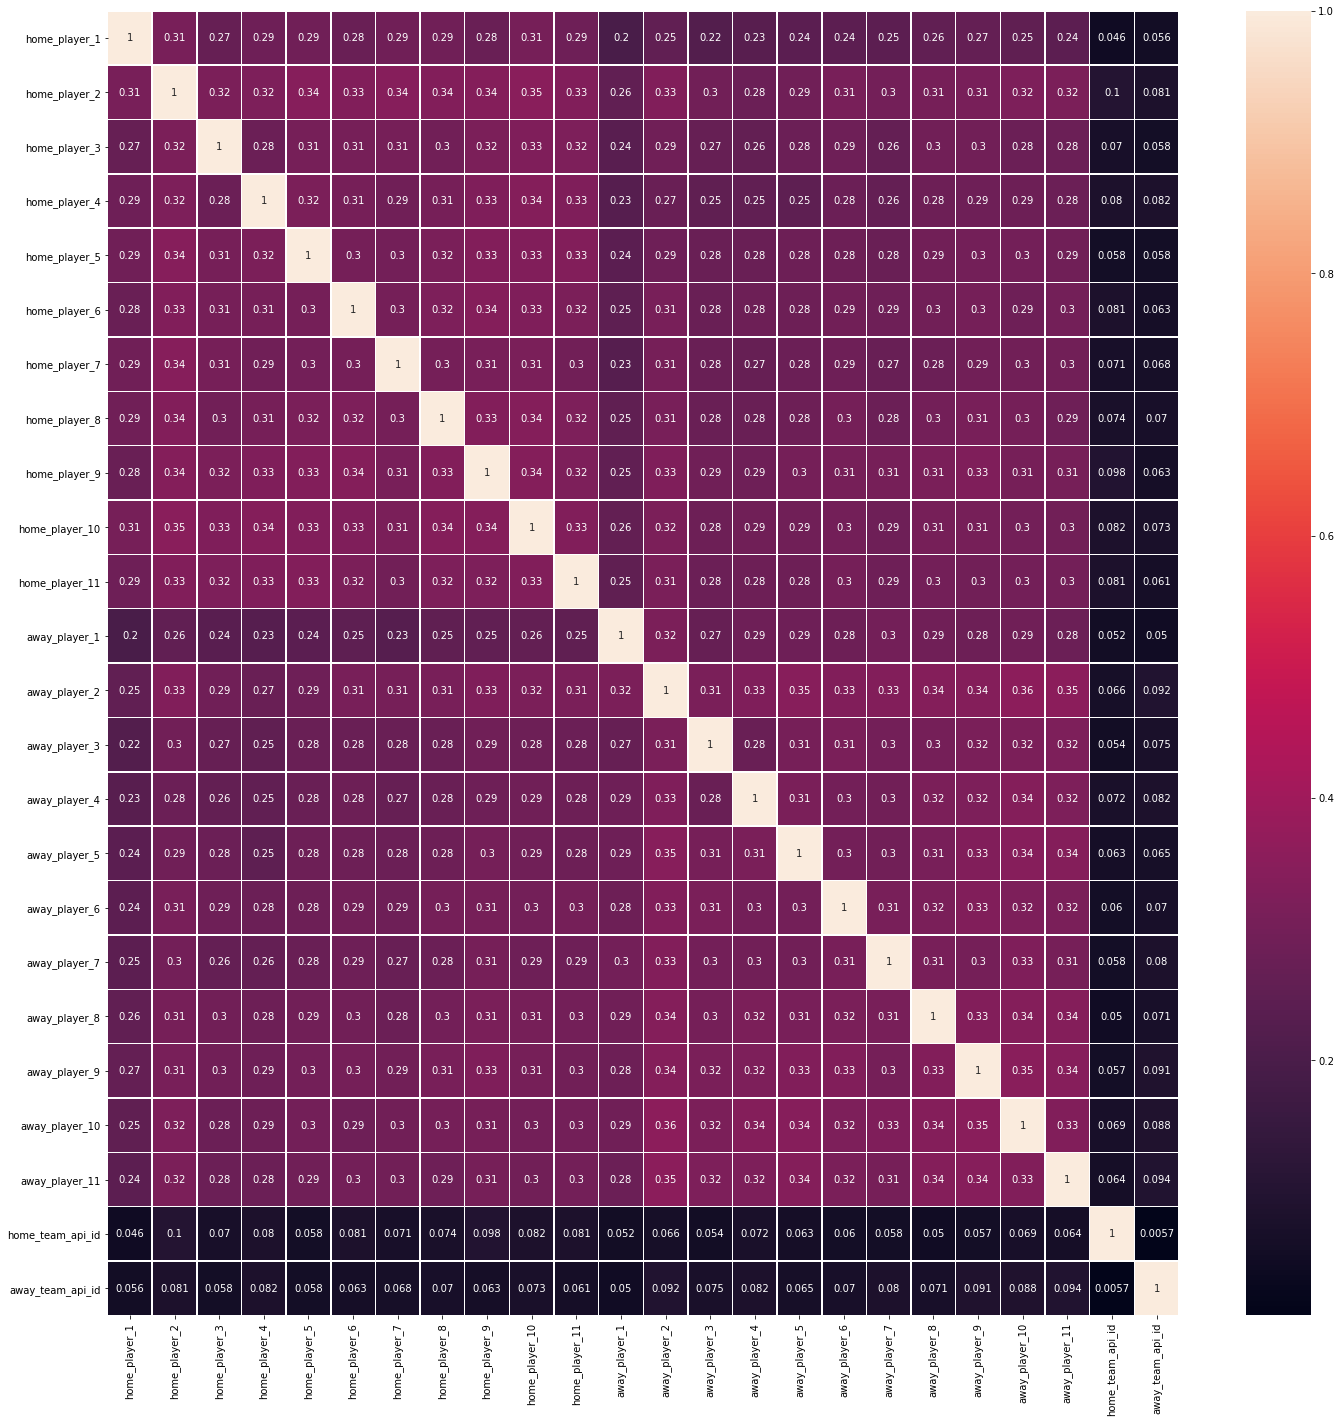

In [135]:
playersOrTeam = data[["home_player_1", "home_player_2", "home_player_3", "home_player_4", "home_player_5",
                                   "home_player_6", "home_player_7", "home_player_8", "home_player_9", "home_player_10",
                                   "home_player_11", "away_player_1", "away_player_2", "away_player_3", "away_player_4",
                                   "away_player_5", "away_player_6", "away_player_7", "away_player_8", "away_player_9",
                                   "away_player_10", "away_player_11", "home_team_api_id", "away_team_api_id",
                                     "goal"]]

corrt = playersOrTeam.select_dtypes(include =['float64','int64']).\
loc[:,playersOrTeam.select_dtypes(include =['float64','int64']).columns[0:]].corr()
fig10,ax10 = plt.subplots(nrows = 1,ncols = 1)
fig10.set_size_inches(w=24,h=24)
sns.heatmap(corrt, annot = True, linewidths=0.5,ax = ax10)

### Aggregating data

<h5>Aggregate data according to the position of each player </h5>

In [98]:
forward_features = ['finishing','volleys']
mid_features = ['short_passing','vision']
defender_features = ['standing_tackle','sliding_tackle']
gk_features = ['gk_diving','gk_handling','gk_kicking','gk_positioning']

# media nao pesada das features
# e suposto dar para um cluster good (diminuicao de dimensoes)
player_att_table['forward'] = (player_att_table[forward_features].iloc[:,0] + player_att_table[forward_features].iloc[:,1])/2
player_att_table['mid'] = (player_att_table[mid_features].iloc[:,0] + player_att_table[mid_features].iloc[:,1])/2
player_att_table['defender'] = (player_att_table[defender_features].iloc[:,0] + player_att_table[defender_features].iloc[:,1])/2
player_att_table['gk'] = (player_att_table[gk_features].iloc[:,0] + player_att_table[gk_features].iloc[:,1] +
                   player_att_table[gk_features].iloc[:,2]+player_att_table[gk_features].iloc[:,3])/4




<p>Even though it is not in the scope of our project using k means, we can use it to check the previous we made previously: that indeed separating the features accordingly to a player's position makes sense. We can infer that k= 4 makes sense which happen to be the number of positions a player can have in the field</p>
<p>We can check that the goalkeeper's ability of a player that is not a goalkeeper is not related which is kind of expected.</p>

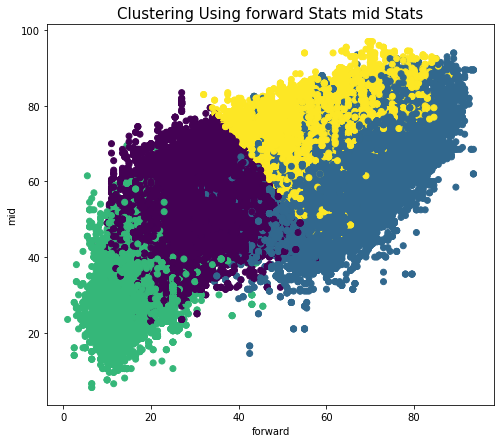

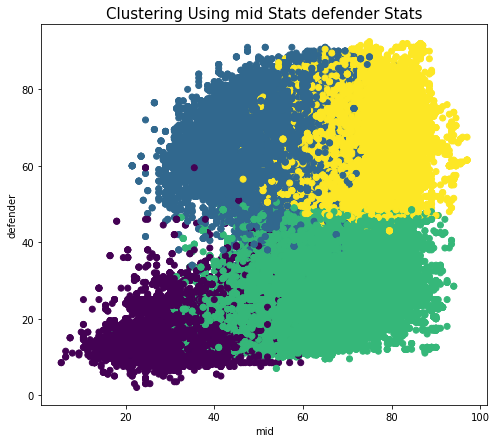

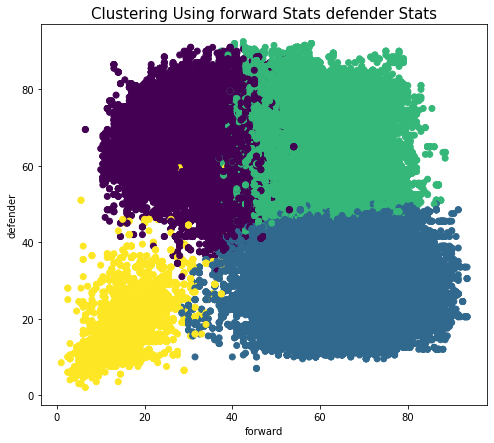

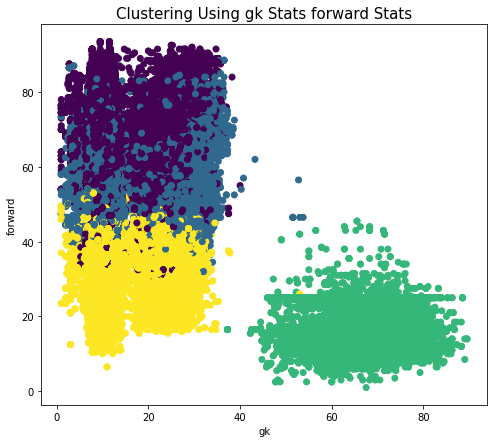

In [99]:
from sklearn.cluster import KMeans

def cluster_position(pos1,pos2):
    model = KMeans(n_clusters=4)
    model.fit(player_att_table[['forward','mid','defender','gk']])
    predict = pd.DataFrame(model.predict(player_att_table[['forward','mid','defender','gk']]))
    predict.columns=['predict']
    plt.figure(figsize=(8,7))
    plt.scatter(x=player_att_table[str(pos1)],y=player_att_table[str(pos2)],c=predict.predict,marker='o')
    plt.title("Clustering Using "+pos1+" Stats "+pos2+" Stats",fontdict={'fontsize':15})
    plt.ylabel(pos2)
    plt.xlabel(pos1)

cluster_position('forward','mid')
cluster_position('mid','defender')
cluster_position('forward','defender')
cluster_position('gk','forward')

<p>We can aggregate the players data also by doing the average of all the players.</p>
<p>By doing this we can reduce from 22 features (eleven home players and eleven away players) to only two (average of home players and average of away players)</p>

In [4]:
home_features = ['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
                'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11']

away_features = ['away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6',
                'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11']

match_table['home_overall_score'] =(match_table[home_features].iloc[:,0] + match_table[home_features].iloc[:,1] +
                                    match_table[home_features].iloc[:,2] + match_table[home_features].iloc[:,3] +
                                    match_table[home_features].iloc[:,4] + match_table[home_features].iloc[:,5] +
                                    match_table[home_features].iloc[:,6] + match_table[home_features].iloc[:,7] +
                                    match_table[home_features].iloc[:,8] + match_table[home_features].iloc[:,9] +
                                    match_table[home_features].iloc[:,10] )/11

match_table['away_overall_score'] =(match_table[away_features].iloc[:,0] + match_table[away_features].iloc[:,1] +
                                    match_table[away_features].iloc[:,2] + match_table[away_features].iloc[:,3] +
                                    match_table[away_features].iloc[:,4] + match_table[away_features].iloc[:,5] +
                                    match_table[away_features].iloc[:,6] + match_table[away_features].iloc[:,7] +
                                    match_table[away_features].iloc[:,8] + match_table[away_features].iloc[:,9] +
                                    match_table[away_features].iloc[:,10] )/11



In [9]:
match_table.head(5)


id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   
1        492474             10000              9994               0   
2        492475              9984              8635               0   
3        492476              9991              9998               5   
4        492477              7947              9985               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   
1               0             NaN             NaN             NaN   
2               3             NaN             NaN             NaN   
3               0             NaN             NaN             NaN   
4               3             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   
2             NaN              NaN              NaN             NaN   
3             NaN              NaN              NaN             NaN   
4             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2            